In [90]:
import pymc3 as pm
import numpy as np

%matplotlib inline

In [91]:
data_shape = (3, 1)
control = np.random.normal(loc=10, scale=1, size=data_shape)    # 2 samples, triplicate measurements.
sample1 = np.random.normal(loc=20, scale=1, size=data_shape)    # same as above
sample2 = np.random.normal(loc=15, scale=1.5, size=data_shape)  # same as above
sample3 = np.random.normal(loc=30, scale=2, size=data_shape)

data = np.concatenate([control, sample1, sample2, sample3], axis=1)
data

array([[ 10.53206422,  20.84598838,  18.21754665,  29.67908164],
       [ 10.23655626,  21.17371621,  14.57404813,  36.068292  ],
       [  8.28934131,  20.19966535,  14.50045766,  29.78325326]])

In [92]:
# Generate some data

n_genotypes = 10

mus = np.random.uniform(low=10, high=100, size=(1, n_genotypes))
sds = np.random.exponential(scale=3, size=(1, n_genotypes))

data = np.random.normal(loc=mus, scale=sds, size=(3, n_genotypes))
data

array([[ 60.66126595,  78.12208337,  63.14919577,  92.61402443,
         21.80679037,  38.87810355,  37.27226086,  43.90560146,
         64.16075576,  21.43689534],
       [ 63.23697714,  78.04954584,  64.88761774,  85.73856098,
         15.14902744,  39.59804815,  38.23936998,  40.7171494 ,
         67.77866984,  17.18308806],
       [ 55.28384386,  76.24767925,  65.26530408,  93.55435073,
         18.82782509,  37.59030976,  37.0954327 ,  40.53997511,
         72.43890061,  21.74606477]])

In [93]:
np.where(mus==mus.max())

(array([0]), array([3]))

In [94]:
# mus[0][1363]

In [95]:
# sds[0][1363]

In [96]:
with pm.Model() as model:
    # mu_a = pm.Normal('mu_a', mu=0., sd=100**2)
    # sigma_a = pm.HalfCauchy('sigma_a', 5)
    # mu_b = pm.Normal('mu_b', mu=0., sd=100**2)
    # sigma_b = pm.HalfCauchy('sigma_b', 5)
    
    # a = pm.Normal('raw_intercept', mu=mu_a, sd=sigma_a, shape=len(set(sample_indices)))
    # b = pm.Normal('raw_slope', mu=mu_b, sd=sigma_b, shape=len(set(sample_indices)))
    
    sd = pm.Exponential('raw_sd', lam=1, shape=data.shape[1])
    mu = pm.Uniform('raw_mu', lower=0, upper=500, shape=data.shape[1])
    raw = pm.Normal('raw_measured', mu=mu, sd=sd, observed=data)

Applied log-transform to raw_sd and added transformed raw_sd_log_ to model.
Applied interval-transform to raw_mu and added transformed raw_mu_interval_ to model.


In [97]:
%%time
with model:
    params = pm.variational.advi(n=100000)
    trace = pm.variational.sample_vp(params, draws=5000)

Iteration 0 [0%]: ELBO = -6682374.01
Iteration 10000 [10%]: Average ELBO = -1268746.0
Iteration 20000 [20%]: Average ELBO = -237.09
Iteration 30000 [30%]: Average ELBO = -134.04
Iteration 40000 [40%]: Average ELBO = -127.94
Iteration 50000 [50%]: Average ELBO = -127.31
Iteration 60000 [60%]: Average ELBO = -127.31
Iteration 70000 [70%]: Average ELBO = -127.31
Iteration 80000 [80%]: Average ELBO = -127.26
Iteration 90000 [90%]: Average ELBO = -127.29
Finished [100%]: Average ELBO = -127.18
CPU times: user 12.8 s, sys: 820 ms, total: 13.6 s
Wall time: 13.3 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16b6bbc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16ba7b5f8>]], dtype=object)

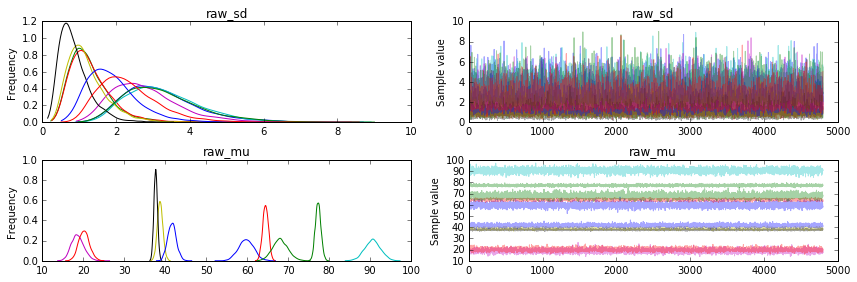

In [98]:
pm.traceplot(trace[200:])

<Container object of 3 artists>

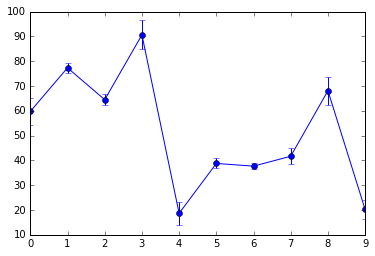

In [99]:
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(30, 4))
plt.errorbar(range(n_genotypes), trace['raw_mu'].mean(axis=0), yerr=trace['raw_mu'].std(axis=0)*3, marker='o')